<a href="https://colab.research.google.com/github/JuanM-GG/maestria/blob/main/mecanistico-optimizacion-lote-alimentado/inhibicion_optimizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar modulos
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from geneticalgorithm import geneticalgorithm as ga
import sys

In [2]:
sys.path.insert(1, 'd:\\DYNAMICAL SIMULATION\\maestria\\maestria')

In [3]:
import utilis.functions as fn
from utilis.models import inhibition_model_fb
from utilis.solvers import euler

In [4]:
def inflow_rate(t):

    return 1

In [5]:
# Parameters
mu_max = 1.20
yxs = 0.2
ks = 280
ypx = 4
ki = 0.3
sf = 50

In [6]:
# Initial conditions
x0 = np.array([0.2, 40, 10])

# Integration time
tf = 100
dt = 0.1
time = np.arange(0, tf, dt)

# Solve the ODEs
x, s, V = euler(inhibition_model_fb, x0, 0, tf, dt, inflow_rate, mu_max, yxs, ks, ypx, ki, sf).T

In [7]:
predicted = fn.create_df_fb(time, x, s, V)
predicted.head()

,t,x,s,V
0,0.0,0.200000,40.000000,10.0
1,0.1,0.199200,40.094000,10.1
2,0.2,0.198422,40.186107,10.2
3,0.3,0.197666,40.276376,10.3
4,0.4,0.196931,40.364860,10.4


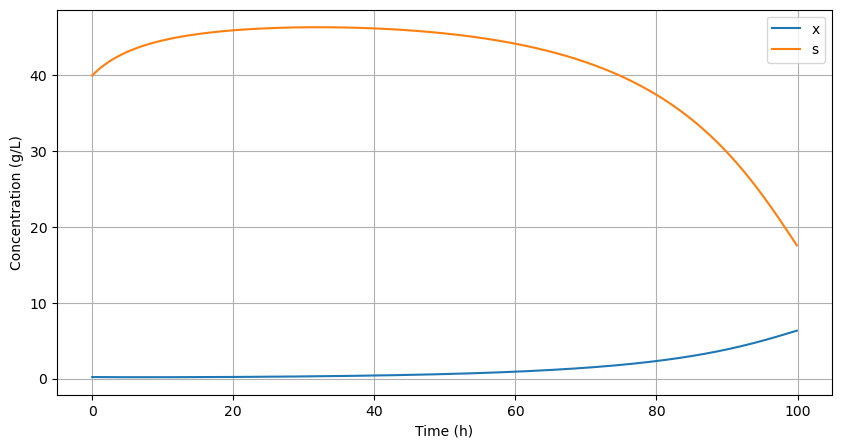

In [8]:
fn.plot_data_fb(predicted)

In [9]:
u = np.arange(0, 3, 0.1)
fitness_values = [fn.fitness_function_fb(u_val, x0, 0, tf, dt, mu_max, yxs, ks, ypx, ki, sf) for u_val in u]

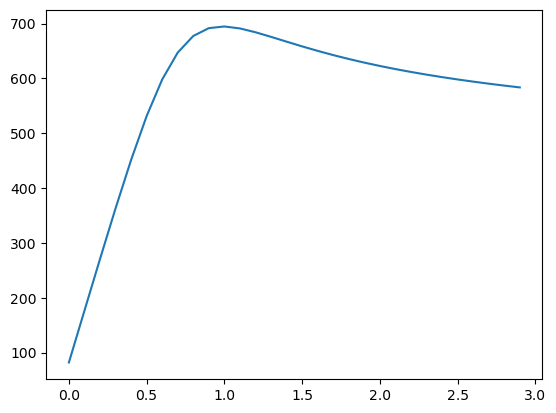

In [10]:
plt.plot(u, fitness_values)

In [11]:
def fitness_function_wrapper(u):

    return -fn.fitness_function_fb(u[0], x0, 0, tf, dt, mu_max, yxs, ks, ypx, ki, sf)

In [12]:
# Configuramos algoritmo genetico
algorithm_param = {'max_num_iteration': 20,
                   'population_size':10,
                   'mutation_probability':0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.8,
                   'parents_portion': 0.3,
                   'elistism':True,
                   'crossover_type':'uniform',
                   'max_iteration_without_improv':None}

In [13]:
# Establecer los rangos de busqueda para las variables de decision
varbound=np.array([
    [0, 3],
])

In [14]:
# LLamar el algortimo genetico para realizar la optimizacion
model=ga(function=fitness_function_wrapper,
         dimension=1,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)

 The best solution found:                                                                           
 [1.03577249]

 Objective function:
 -693.9714361847175


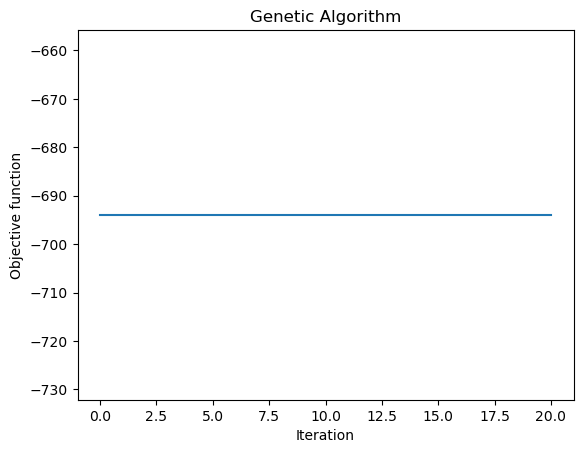

In [15]:
# Realizar la busqueda
model.run()

In [16]:
model.best_function

-693.9714361847175

In [17]:
model.best_variable

array([1.03577249])